In [42]:
# In Class Lab 6
# Surface Brightness Profiles


In [43]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [44]:
# Function that returns the Sersic Profile for an elliptical system (Re)
def SersicE(R, Re, n, Mtot):
# Inputs:
    # R = array of radii (kpc)
    # Re = half light radius (kpc)
    # n = the Sersic index
    # Mtot = total stellar mass (Msun)
# Return:
    # Surface brightness profile in Lsun/kpc^2
    
    # Assuming M/L = 1
    L = Mtot # total luminosity = total stellar mass
    
    # Ie= L/(7.2*pi*Re^2)
    Ie = L/7.2/np.pi/Re**2
    
    # exponent
    A = (R/Re)**(1/n) - 1
    
    return Ie*np.exp(-7.6*A)

# Part B

a) Create an instance of the MassProfile Class for the MW. Store it as a variable `MW`. 


In [45]:
M31 = MassProfile("M31",0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [46]:
R = np.arange(0.1, 30, 0.1)

c) Define a new array called `BulgeMass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `BulgeMass` by adding `.value` 


In [47]:
BulgeMass = M31.MassEnclosed(3,R) # particle type 3 = bulge

In [48]:
BulgeMass[10]

<Quantity 4.43864301e+09 solMass>

In [19]:
d) Compute the surface mass density profile for the simulated bulge and store it as an array called `BulgeI`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

SyntaxError: invalid syntax (<ipython-input-19-91640ceceb02>, line 1)

In [49]:
BulgeI = BulgeMass/4/np.pi/R**2
BulgeI

<Quantity [5.58507322e+07, 7.97867603e+07, 1.17907101e+08, 1.62565524e+08,
           2.11594488e+08, 2.56204153e+08, 2.93745542e+08, 3.17401706e+08,
           3.17768011e+08, 3.11248152e+08, 2.91914040e+08, 2.75984620e+08,
           2.60227587e+08, 2.42698298e+08, 2.26417095e+08, 2.11247915e+08,
           1.96595682e+08, 1.83854306e+08, 1.72569259e+08, 1.61967123e+08,
           1.51938597e+08, 1.42775440e+08, 1.34325309e+08, 1.26786149e+08,
           1.19973756e+08, 1.13825964e+08, 1.08111607e+08, 1.02969699e+08,
           9.77364096e+07, 9.29781713e+07, 8.84462391e+07, 8.43293073e+07,
           8.06073404e+07, 7.69638550e+07, 7.34168459e+07, 7.03305517e+07,
           6.72913027e+07, 6.44703545e+07, 6.17678568e+07, 5.93015096e+07,
           5.69139228e+07, 5.47742442e+07, 5.26963719e+07, 5.06786049e+07,
           4.88097969e+07, 4.70613684e+07, 4.53979081e+07, 4.38273107e+07,
           4.23757088e+07, 4.09593313e+07, 3.95774234e+07, 3.83059069e+07,
           3.70785464e+07

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [50]:
BulgeTotal = np.max(BulgeMass) # Total mass of the bulge
BulgeTotal

<Quantity 1.7838793e+10 solMass>

In [51]:
Low = BulgeTotal/2
High = BulgeTotal/2 + BulgeTotal/2*0.01

In [52]:
index = np.where( (BulgeMass > Low) & (BulgeMass < High))

In [53]:
Re = R[index]

In [54]:
BulgeTotal/2

<Quantity 8.91939648e+09 solMass>

In [55]:
Re

array([2.3])

# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

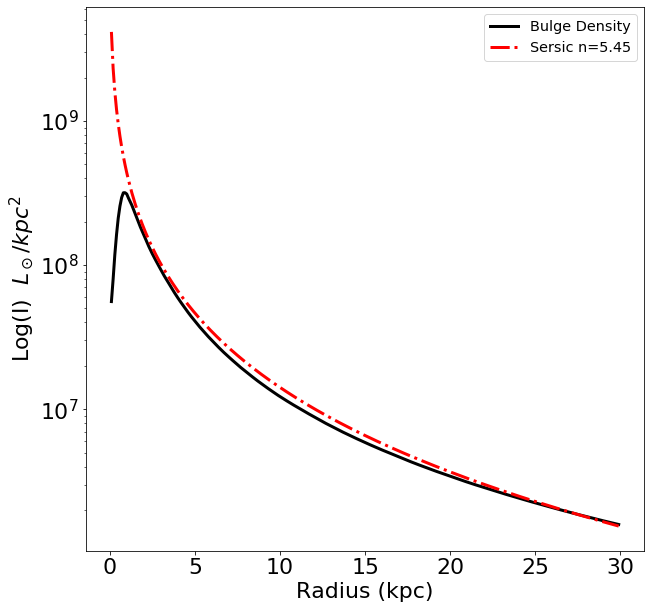

In [59]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
plt.semilogy(R,SersicE(R, Re, 5.45, BulgeTotal), color='red', linewidth=3, linestyle='-.', label='Sersic n=5.45')


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
